# NMF one-by-one

In [1]:
# imports
import os
import numpy as np
from matplotlib import pyplot as plt
from importlib import resources

import seaborn as sns

from NonnegMFPy import nmf

#from ihip.ihop import io as ihop_io
from ihop.hydrolight import loisel23
from oceancolor.iop import cross

from astropy.io import fits

import nmf_imaging 

In [2]:
%matplotlib ipympl

# Load up data

In [3]:
X=4
Y=0
ds = loisel23.load_ds(X, Y)

In [4]:
spec = ds['a'].data
wave = ds.Lambda.data
spec.shape

(3320, 81)

## Cut

In [5]:
cut = wave >= 400.
spec = spec[:,cut]
wave = wave[cut]

## Remove water

In [6]:
a_w = cross.a_water(wave, data='IOCCG')
spec_nw = spec - np.outer(np.ones(3320), a_w)

## Reshape

In [7]:
spec_nw = np.reshape(spec_nw, (spec_nw.shape[0], 
                     spec_nw.shape[1], 1))
spec_nw.shape

(3320, 71, 1)

# Run me

## Mask

In [8]:
mask = (spec_nw >= 0.).astype(int)
mask.shape

(3320, 71, 1)

## Error

In [9]:
err = np.ones_like(mask)*0.05

## Let's go

In [10]:
path = os.path.join(resources.files('ihop'), 
                    'data', 'NMF')
outroot = os.path.join(path, 'L23_NMF_4')

In [12]:
comps = nmf_imaging.NMFcomponents(ref=spec_nw, mask=mask, ref_err=err, n_components=4,
                          path_save=outroot, oneByOne=True)

Building components one by one...
	 path_save provided, you might want to load data and continue previous component calculation
		 loading from /home/xavier/Projects/Oceanography/python/ihop/ihop/data/NMF/L23_NMF_4_comp.fits for components.
		 /home/xavier/Projects/Oceanography/python/ihop/ihop/data/NMF/L23_NMF_4_comp.fits does not exist, calculating from scratch.
	1 of 4
Took 0.001 minutes to reach current solution.
			 Calculation for 1 components done, overwriting raw 2D component matrix at /home/xavier/Projects/Oceanography/python/ihop/ihop/data/NMF/L23_NMF_4_comp.fits
			 Calculation for 1 components done, overwriting raw 2D coefficient matrix at /home/xavier/Projects/Oceanography/python/ihop/ihop/data/NMF/L23_NMF_4_coef.fits
	2 of 4
Took 0.014 minutes to reach current solution.
			 Calculation for 2 components done, overwriting raw 2D component matrix at /home/xavier/Projects/Oceanography/python/ihop/ihop/data/NMF/L23_NMF_4_comp.fits
			 Calculation for 2 components done, overwri

/home/xavier/Python/nmf_imaging/nmf_imaging.py:309: RuntimeWarning: invalid value encountered in divide
  components = (components.T/np.sqrt(np.nansum(components**2, axis = (1, 2))).T).T


# Load em

In [13]:
hdul = fits.open(outroot+'_comp.fits')
hdul.info()

Filename: /home/xavier/Projects/Oceanography/python/ihop/ihop/data/NMF/L23_NMF_4_comp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (4, 71)   float64   


## Plot em

In [14]:
M = hdul[0].data.T
M.shape

(4, 71)

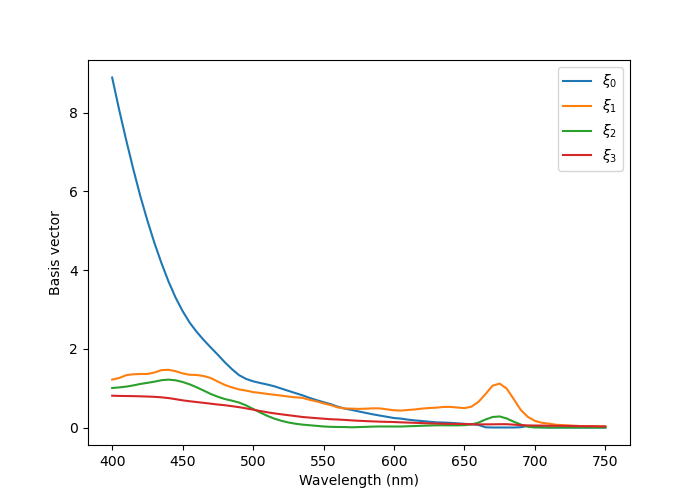

In [15]:
#M = g.W.T
#wave = ds.Lambda.data
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(M.shape[0]):
    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()

# Coeff

In [18]:
hdul2 = fits.open(outroot+'_coef.fits')

In [20]:
hdul2.info()
coeff = hdul2[0].data.T

Filename: /home/xavier/Projects/Oceanography/python/ihop/ihop/data/NMF/L23_NMF_4_coef.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (3320, 4)   float64   


# Recon

In [22]:
recon = np.dot(coeff, M)
recon.shape

(3320, 71)

In [23]:
coeff.shape

(3320, 4)